# Grid Search RNN

ANTM.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ===========================================
# 1. Download Data
# ===========================================
stock = 'ANTM.JK'
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
      for epochs in epochs_list:
        for batch_size in batch_size_list:
          for dropout in dropout_list:
            for learning_rate in learning_rate_list:
                print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                optimizer = Adam(learning_rate=learning_rate)

                # Build RNN model
                model = Sequential()
                model.add(SimpleRNN(neurons, input_shape=(time_step, 1)))
                model.add(Dropout(dropout))
                model.add(Dense(1))
                model.compile(optimizer=optimizer, loss='mean_squared_error')

                # Train
                with tf.device('/GPU:0'):
                  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict
                y_pred = model.predict(X_test, verbose=0)

                # Inverse transform
                y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                y_pred_inv = scaler.inverse_transform(y_pred)

                # Evaluate
                rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                # Save result
                results.append({
                    'time_step': time_step,
                    'neurons': neurons,
                    'epochs': epochs,
                    'batch_size': batch_size,
                    'dropout': dropout,
                    'learning_rate': learning_rate,
                    'RMSE': rmse,
                    'MAPE': mape
                })

                if rmse < best_rmse:
                    best_rmse = rmse
                    print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                    model.save(f"best_rnn_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_rnn_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_rnn_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=59.2979116919341, MAPE=0.03039719234253727
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=44.08303235865983, MAPE=0.021028151010777544
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=42.93543987997003, MAPE=0.02085967110710994
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=50, batch_size=32, dropout=0.1, learning_ra

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BBNI.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ===========================================
# 1. Download Data
# ===========================================
stock = 'BBNI.JK'
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
      for epochs in epochs_list:
        for batch_size in batch_size_list:
          for dropout in dropout_list:
            for learning_rate in learning_rate_list:
                print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                optimizer = Adam(learning_rate=learning_rate)

                # Build RNN model
                model = Sequential()
                model.add(SimpleRNN(neurons, input_shape=(time_step, 1)))
                model.add(Dropout(dropout))
                model.add(Dense(1))
                model.compile(optimizer=optimizer, loss='mean_squared_error')

                # Train
                with tf.device('/GPU:0'):
                  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict
                y_pred = model.predict(X_test, verbose=0)

                # Inverse transform
                y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                y_pred_inv = scaler.inverse_transform(y_pred)

                # Evaluate
                rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                # Save result
                results.append({
                    'time_step': time_step,
                    'neurons': neurons,
                    'epochs': epochs,
                    'batch_size': batch_size,
                    'dropout': dropout,
                    'learning_rate': learning_rate,
                    'RMSE': rmse,
                    'MAPE': mape
                })

                if rmse < best_rmse:
                    best_rmse = rmse
                    print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                    model.save(f"best_rnn_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_rnn_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_rnn_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=181.34612731835745, MAPE=0.034018506768296854
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=148.38021038206975, MAPE=0.027478900975454135
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005
>>> New best model! RMSE=139.15191567785195, MAPE=0.025773902106696854
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
>>> New best model! RMSE=115.96823329213248, MAPE=0.021614808883628423
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BBRI.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ===========================================
# 1. Download Data
# ===========================================
stock = 'BBRI.JK'
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
      for epochs in epochs_list:
        for batch_size in batch_size_list:
          for dropout in dropout_list:
            for learning_rate in learning_rate_list:
                print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                optimizer = Adam(learning_rate=learning_rate)

                # Build RNN model
                model = Sequential()
                model.add(SimpleRNN(neurons, input_shape=(time_step, 1)))
                model.add(Dropout(dropout))
                model.add(Dense(1))
                model.compile(optimizer=optimizer, loss='mean_squared_error')

                # Train
                with tf.device('/GPU:0'):
                  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict
                y_pred = model.predict(X_test, verbose=0)

                # Inverse transform
                y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                y_pred_inv = scaler.inverse_transform(y_pred)

                # Evaluate
                rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                # Save result
                results.append({
                    'time_step': time_step,
                    'neurons': neurons,
                    'epochs': epochs,
                    'batch_size': batch_size,
                    'dropout': dropout,
                    'learning_rate': learning_rate,
                    'RMSE': rmse,
                    'MAPE': mape
                })

                if rmse < best_rmse:
                    best_rmse = rmse
                    print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                    model.save(f"best_rnn_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_rnn_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_rnn_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=128.98677640169032, MAPE=0.02605939739167702
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=107.8504839201654, MAPE=0.021436154121090588
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005
>>> New best model! RMSE=101.28984315263018, MAPE=0.019841676150227246
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
>>> New best model! RMSE=92.65928847825062, MAPE=0.017797278838366702
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BMRI.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ===========================================
# 1. Download Data
# ===========================================
stock = 'BMRI.JK'
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
      for epochs in epochs_list:
        for batch_size in batch_size_list:
          for dropout in dropout_list:
            for learning_rate in learning_rate_list:
                print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                optimizer = Adam(learning_rate=learning_rate)

                # Build RNN model
                model = Sequential()
                model.add(SimpleRNN(neurons, input_shape=(time_step, 1)))
                model.add(Dropout(dropout))
                model.add(Dense(1))
                model.compile(optimizer=optimizer, loss='mean_squared_error')

                # Train
                with tf.device('/GPU:0'):
                  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict
                y_pred = model.predict(X_test, verbose=0)

                # Inverse transform
                y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                y_pred_inv = scaler.inverse_transform(y_pred)

                # Evaluate
                rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                # Save result
                results.append({
                    'time_step': time_step,
                    'neurons': neurons,
                    'epochs': epochs,
                    'batch_size': batch_size,
                    'dropout': dropout,
                    'learning_rate': learning_rate,
                    'RMSE': rmse,
                    'MAPE': mape
                })

                if rmse < best_rmse:
                    best_rmse = rmse
                    print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                    model.save(f"best_rnn_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_rnn_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_rnn_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=249.64877788097724, MAPE=0.03787211228235573
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=195.96640015120363, MAPE=0.029407900651895923
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005


>>> New best model! RMSE=157.53121831341213, MAPE=0.02292321134889582
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
>>> New best model! RMSE=144.16175181386694, MAPE=0.021174920801796646
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=133.85606489444046, MAPE=0.0191637541055058
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.2, learning_rate=0.005
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.3, learning_rate=0.005
Running: time_step=10, neurons=50, epo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TLKM.JK

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

from google.colab import files

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ===========================================
# 1. Download Data
# ===========================================
stock = 'TLKM.JK'
data = yf.download(stock, start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ===========================================
# 2. Create Dataset
# ===========================================
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# ===========================================
# 3. Grid Search Parameters
# ===========================================
time_steps_list = [10, 30, 60, 90]
neurons_list = [50, 100]
epochs_list = [25, 50, 100]
batch_size_list = [32, 64]
dropout_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.005]

results = []
best_rmse = float("inf")

# ===========================================
# 4. Grid Search Loop
# ===========================================
for time_step in time_steps_list:
    # Make dataset
    X, y = create_dataset(scaled_data, time_step)
    dates = data.index[time_step:]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split dataset
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    for neurons in neurons_list:
      for epochs in epochs_list:
        for batch_size in batch_size_list:
          for dropout in dropout_list:
            for learning_rate in learning_rate_list:
                print(f"Running: time_step={time_step}, neurons={neurons}, epochs={epochs}, batch_size={batch_size}, dropout={dropout}, learning_rate={learning_rate}")

                optimizer = Adam(learning_rate=learning_rate)

                # Build RNN model
                model = Sequential()
                model.add(SimpleRNN(neurons, input_shape=(time_step, 1)))
                model.add(Dropout(dropout))
                model.add(Dense(1))
                model.compile(optimizer=optimizer, loss='mean_squared_error')

                # Train
                with tf.device('/GPU:0'):
                  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict
                y_pred = model.predict(X_test, verbose=0)

                # Inverse transform
                y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
                y_pred_inv = scaler.inverse_transform(y_pred)

                # Evaluate
                rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

                # Save result
                results.append({
                    'time_step': time_step,
                    'neurons': neurons,
                    'epochs': epochs,
                    'batch_size': batch_size,
                    'dropout': dropout,
                    'learning_rate': learning_rate,
                    'RMSE': rmse,
                    'MAPE': mape
                })

                if rmse < best_rmse:
                    best_rmse = rmse
                    print(f">>> New best model! RMSE={rmse}, MAPE={mape}")
                    model.save(f"best_rnn_{stock}.keras")

# ===========================================
# 5. Results
# ===========================================
results_df = pd.DataFrame(results)
results_df.to_excel('grid_search_rnn_'+stock+'.xlsx', index=False)
print(results_df.sort_values(by='RMSE'))

files.download('grid_search_rnn_'+stock+'.xlsx')

[*********************100%***********************]  1 of 1 completed


Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.001
>>> New best model! RMSE=89.56563553707339, MAPE=0.02732320994601811
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.1, learning_rate=0.005
>>> New best model! RMSE=73.14195838710548, MAPE=0.02342842075413232
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.2, learning_rate=0.005
>>> New best model! RMSE=60.21318266665616, MAPE=0.018454506498197926
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=32, dropout=0.3, learning_rate=0.005
>>> New best model! RMSE=59.97277152113853, MAPE=0.018325000362198345
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dropout=0.1, learning_rate=0.001
Running: time_step=10, neurons=50, epochs=25, batch_size=64, dro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# RNN Scale MinMax

ANTM.JK

[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
RMSE: 42.93543987997003
MAPE: 0.02085967110710994


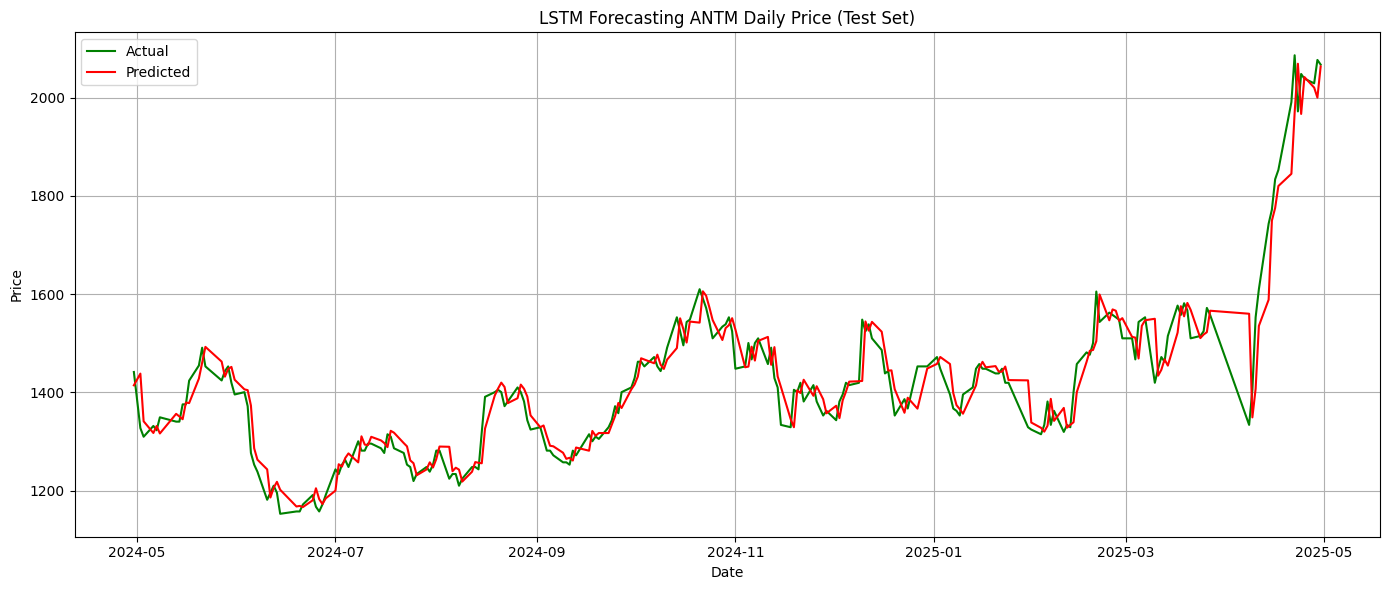

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('ANTM.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model("best_rnn_ANTM.JK.keras")

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting ANTM Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

BBNI.JK

[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
RMSE: 108.32198668095049
MAPE: 0.019783394817129117


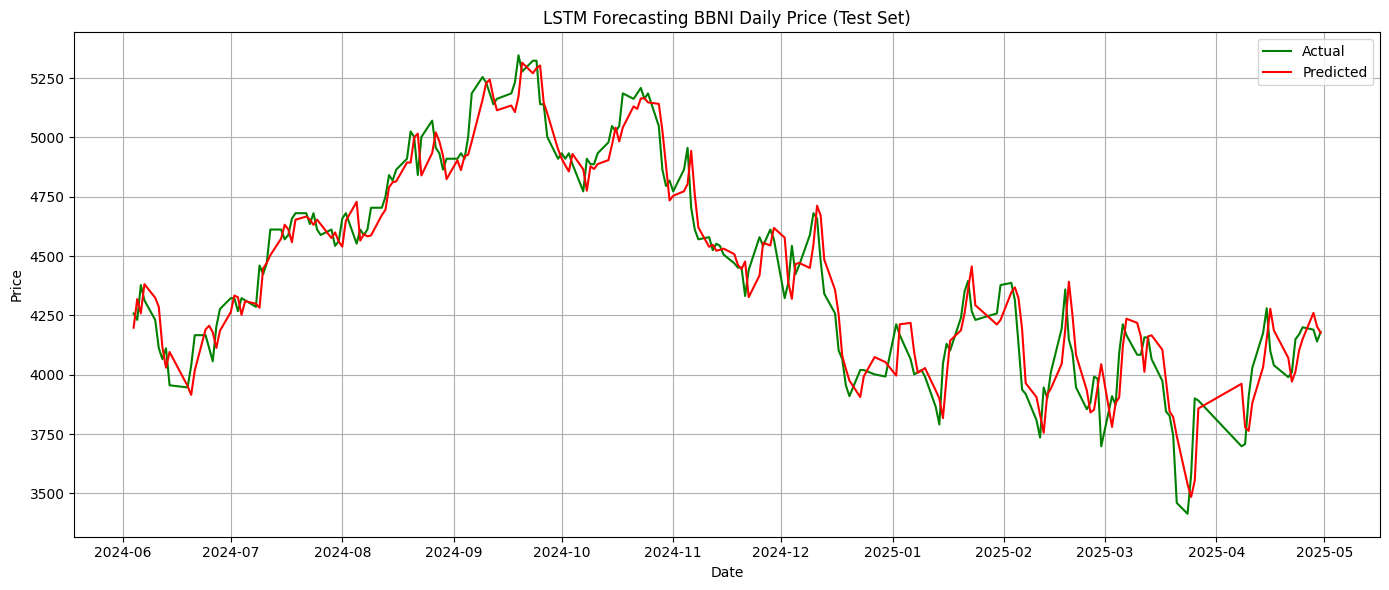

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('BBNI.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 90
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model("best_rnn_BBNI.JK.keras")

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting BBNI Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

BBRI.JK

[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
RMSE: 90.59157333648615
MAPE: 0.017206819399739257


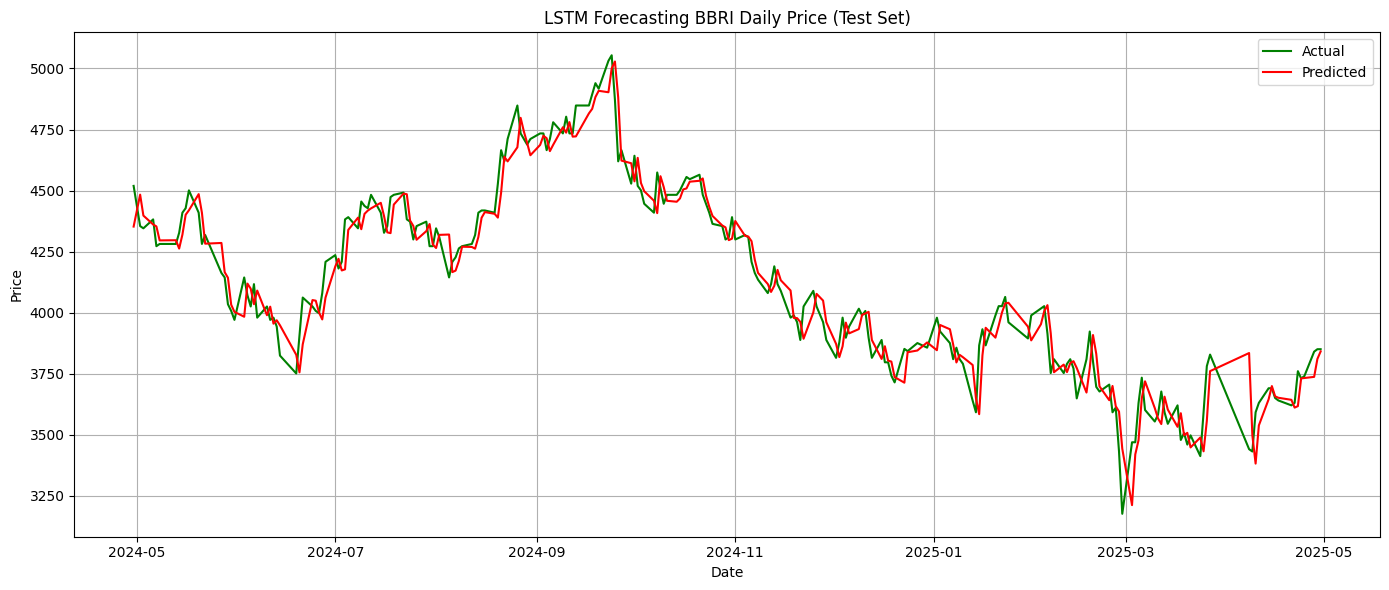

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('BBRI.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

learning_rate = 0.005
optimizer = Adam(learning_rate=learning_rate)

# ================================
# 5. Model LSTM
# ================================
model = load_model('best_rnn_BBRI.JK.keras')

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting BBRI Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

BMRI.JK

[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
RMSE: 129.43782192148876
MAPE: 0.01891231106453183


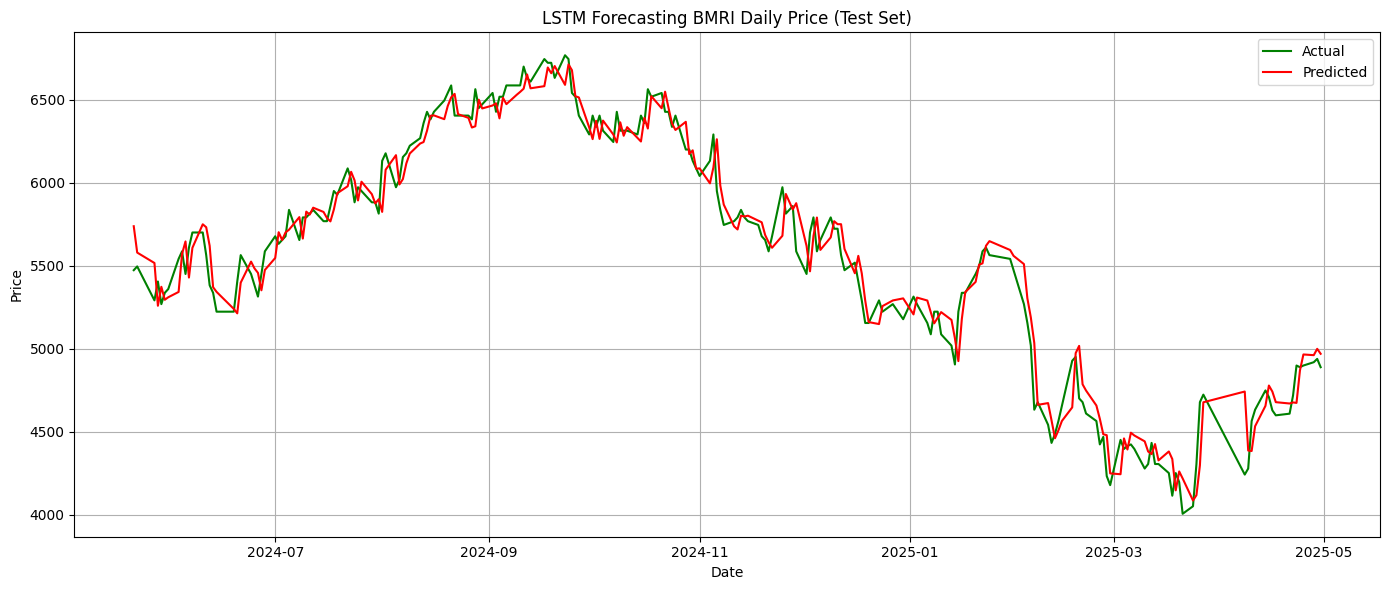

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('BMRI.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

# ================================
# 5. Model LSTM
# ================================
model = load_model("best_rnn_BMRI.JK.keras")

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting BMRI Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

TLKM.JK

[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
RMSE: 55.79285598871049
MAPE: 0.016712012041785646


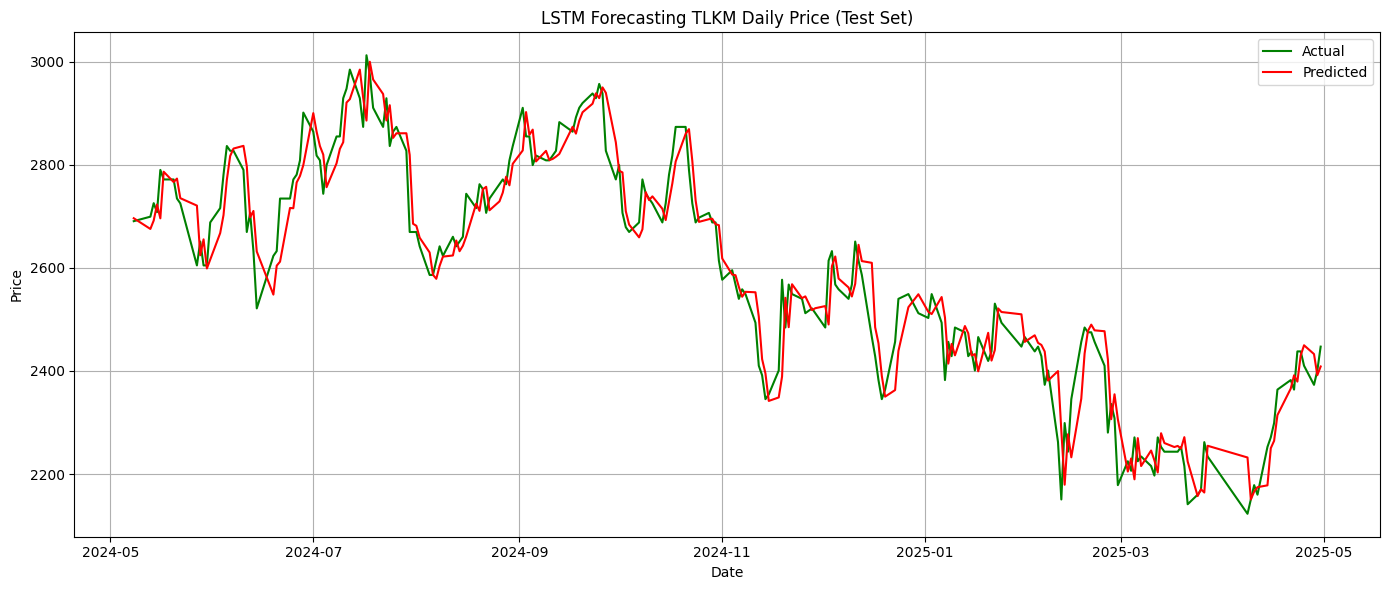

In [ ]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential, load_model
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ================================
# 1. Raw Data
# ================================
data = yf.download('TLKM.JK', start='2021-05-01', end='2025-05-01')
data = data[['Close']].dropna()
data.rename(columns={'Close': 'Price'}, inplace=True)

# ================================
# 2. Normalisasi
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ================================
# 3. Buat dataset untuk model
# ================================
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_data, time_step)

dates = data.index[time_step:]

X = X.reshape((X.shape[0], X.shape[1], 1))

# ================================
# 4. Split Dataset (75% train, 25% test)
# ================================
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

# ================================
# 5. Model LSTM
# ================================
model = load_model("best_rnn_TLKM.JK.keras")

# ================================
# 6. Evaluasi Model
# ================================
y_pred = model.predict(X_test)

# Inverse transform (kembalikan ke skala harga asli)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)

# ================================
# 7. Plot
# ================================
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Actual', color='green')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecasting TLKM Daily Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Klasifikasi Buy Hold Sell

Simulasi 30 hari

In [1]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, confusion_matrix, classification_report

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [10, 90, 10, 60, 30]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")
  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model RNN
  # ================================
  model = load_model("best_rnn_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  # rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  # mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  # print("RMSE:", rmse)
  # print("MAPE:", mape)

  # plt.figure(figsize=(10, 5))
  # plt.plot(dates_test[-30:], y_test_inv[-30:], label="Actual", color='green', marker='o', linewidth=2)
  # plt.plot(dates_test[-30:], y_pred_inv[-30:], label="Predicted", color='red', marker='o', linewidth=2)
  # plt.title(f"{stock} - Actual vs Predicted (30 Hari Terakhir)")
  # plt.xlabel("Date")
  # plt.ylabel("Price")
  # plt.legend()
  # plt.grid(True, linestyle='--', alpha=0.5)
  # plt.tight_layout()
  # plt.show()

  # ================================
  # 7. Simulasi
  # ================================
  def simulate_profit(actual_prices, predicted_prices, thresholds, step_ahead=1, initial_balance=1000000):
    results = pd.DataFrame(index=[f"{lt*100:.0f}%" for lt in thresholds],
                           columns=[f"{ut*100:.0f}%" for ut in thresholds])

    # 30 data test terakhir
    actual = actual_prices[-30:].flatten()
    predicted = predicted_prices[-30:].flatten()

    for lt in thresholds:
      for ut in thresholds:
          #print("===================================================================================================")
          #print("LT: ", lt)
          #print("UT: ", ut)
          cash = initial_balance
          shares = 0

          for i in range(len(predicted) - step_ahead):
              curr_price = actual[i]
              next_pred_price = predicted[i + step_ahead]
              change = (next_pred_price - curr_price) / curr_price

              # Buy jika prediksi naik lebih dari upper threshold
              if change >= ut and shares == 0:
                  shares = cash / curr_price
                  cash = 0
                  #print(i, ": Buy")

              # Sell jika prediksi turun lebih dari lower threshold
              elif change <= -lt and shares > 0:
                  cash = shares * curr_price
                  shares = 0
                  #print(i, ": Sell")

              #else:
              #    print(i, ": Hold")

          # Sell jika masih ada di akhir
          if shares > 0:
              cash = shares * actual[-1]
              shares = 0

          total_return = (cash - initial_balance) / initial_balance * 100
          results.loc[f"{lt*100:.0f}%", f"{ut*100:.0f}%"] = total_return

    return results

  thresholds = [0.01, 0.02, 0.03, 0.04, 0.05]
  profit_matrix = simulate_profit(y_test_inv, y_pred_inv, thresholds)

  print(profit_matrix)



================================== ANTM.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
           1%   2%   3%   4%   5%
1%   9.395976  0.0  0.0  0.0  0.0
2%  45.637584  0.0  0.0  0.0  0.0
3%  45.637584  0.0  0.0  0.0  0.0
4%  45.637584  0.0  0.0  0.0  0.0
5%  45.637584  0.0  0.0  0.0  0.0


================================== BBNI.JK ==================================



[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[*********************100%***********************]  1 of 1 completed

           1%         2%   3%   4%   5%
1%  19.650276  26.487477  0.0  0.0  0.0
2%   2.346537  20.806921  0.0  0.0  0.0
3%   2.346537  20.806921  0.0  0.0  0.0
4%   2.346537  20.806921  0.0  0.0  0.0
5%   2.346537  20.806921  0.0  0.0  0.0


================================== BBRI.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
           1%   2%   3%   4%   5%
1%  -0.274728  0.0  0.0  0.0  0.0
2%  11.906413  0.0  0.0  0.0  0.0
3%  11.906413  0.0  0.0  0.0  0.0
4%  11.906413  0.0  0.0  0.0  0.0
5%  11.906413  0.0  0.0  0.0  0.0


================================== BMRI.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
           1%         2%         3%   4%   5%
1%  14.266624  14.266624  15.245356  0.0  0.0
2%  14.266624  14.266624  15.245356  0.0  0.0
3%  14.266624  14.266624  15.245356  0.0  0.0
4%  14.266624  14.266624  15.245356  0.0  0.0
5%  14.266624  14.266624  15.245356  0.0  0.0


================================== TLKM.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
          1%   2%   3%   4%   5%
1%  15.28384  0.0  0.0  0.0  0.0
2%  15.28384  0.0  0.0  0.0  0.0
3%  15.28384  0.0  0.0  0.0  0.0
4%  15.28384  0.0  0.0  0.0  0.0
5%  15.28384  0.0  0.0  0.0  0.0


# Buy Hold Sell Simulasi

In [1]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [10, 90, 10, 60, 30]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

def get_signal(actual_prices, future_prices, step_ahead=1, lower_threshold=0.05, upper_threshold=0.05):
  signals = []
  for i in range(len(actual_prices) - step_ahead):
      curr_price = actual_prices[i]
      future_price = future_prices[i + step_ahead]
      change = (future_price - curr_price) / curr_price

      if change >= upper_threshold:
          signals.append("Buy")
      elif change <= -lower_threshold:
          signals.append("Sell")
      else:
          signals.append("Hold")
  return signals

for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")
  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model RNN
  # ================================
  model = load_model("best_rnn_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  # Inverse transform
  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  print("RMSE:", rmse)
  print("MAPE:", mape)

  # ================================
  # 7. Rekomendasi Buy/Hold/Sell Aktual dan Prediksi
  # ================================
  step_ahead = 1
  thresholds = {
      "ANTM.JK": (0.02, 0.01),
      "BBNI.JK": (0.01, 0.02),
      "BBRI.JK": (0.02, 0.01),
      "BMRI.JK": (0.01, 0.03),
      "TLKM.JK": (0.01, 0.01)
  }

  y_test_inv = y_test_inv[-30:]
  y_pred_inv = y_pred_inv[-30:]

  dates_eval = dates_test[-30:]

  lt, ut = thresholds[stock]
  signals_pred = get_signal(y_test_inv.flatten(), y_pred_inv.flatten(), step_ahead, lt, ut)

  # ================================
  # 8. Export ke Excel
  # ================================
  output_file = "hasil_rekomendasi_rnn.xlsx"

  if i == 0:  # Jika sheet pertama → buat file baru
      mode = 'w'
  else:      # Sheet berikutnya → append
      mode = 'a'

  # Potong agar jumlah signal cocok
  dates_final = dates_eval[1:]
  actual_final = y_test_inv[:-1]
  pred_final = y_pred_inv[1:]

  # Hitung persentase perubahan aktual
  pct_change = ((actual_final - y_test_inv[:-1]) / y_test_inv[:-1]) * 100

  df_out = pd.DataFrame({
      "Tanggal": dates_final,
      "Harga Aktual": actual_final.flatten(),
      "% Perubahan": pct_change.flatten(),
      "Signal Sistem": signals_pred,
      "Signal Ahli": "",
      "Alasan Ahli": ""
  })

  with pd.ExcelWriter(output_file, engine="openpyxl", mode=mode) as writer:
      df_out.to_excel(writer, sheet_name=stock.replace(".JK",""), index=False)

  print(f"➡ Data untuk {stock} berhasil disimpan ke sheet Excel!")



================================== ANTM.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
RMSE: 42.93545180227791
MAPE: 0.020859675062110818
➡ Data untuk ANTM.JK berhasil disimpan ke sheet Excel!


================================== BBNI.JK ==================================



[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
RMSE: 108.32199521019551
MAPE: 0.019783403909476107
➡ Data untuk BBNI.JK berhasil disimpan ke sheet Excel!


================================== BBRI.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
RMSE: 90.59158012730857
MAPE: 0.017206819180230707
➡ Data untuk BBRI.JK berhasil disimpan ke sheet Excel!


================================== BMRI.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE: 129.43784389066883
MAPE: 0.018912316312478895
➡ Data untuk BMRI.JK berhasil disimpan ke sheet Excel!


================================== TLKM.JK ==================================



[*********************100%***********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE: 55.79285704520138
MAPE: 0.0167120122556282
➡ Data untuk TLKM.JK berhasil disimpan ke sheet Excel!


# Confusion matrix

Ahli

In [3]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, confusion_matrix, classification_report, accuracy_score

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [10, 90, 10, 60, 30]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

def get_signal(actual_prices, future_prices, step_ahead=1, lower_threshold=0.05, upper_threshold=0.05):
  signals = []
  for i in range(len(actual_prices) - step_ahead):
      curr_price = actual_prices[i]
      future_price = future_prices[i + step_ahead]
      change = (future_price - curr_price) / curr_price

      if change >= upper_threshold:
          signals.append("Buy")
      elif change <= -lower_threshold:
          signals.append("Sell")
      else:
          signals.append("Hold")
  return signals

expert_signals_dict = {
  "ANTM.JK": [
      "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Buy",
      "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Hold","Hold",
      "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold"
  ],
  "BBNI.JK": [
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Buy",
    "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Hold","Sell",
    "Buy","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold"
],
  "BBRI.JK": [
    "Hold","Hold","Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold",
    "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Hold","Hold",
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold", "Hold"
],
  "BMRI.JK": [
    "Buy","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Buy",
    "Hold","Hold","Sell","Hold","Buy","Buy","Hold","Hold","Hold","Hold",
    "Hold","Hold","Hold","Hold","Sell","Hold","Hold","Hold","Hold"
],
  "TLKM.JK": [
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Sell",
    "Hold","Hold","Hold","Hold","Buy","Hold","Hold","Hold","Sell","Hold",
    "Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold","Hold"
  ]
}


for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")
  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model RNN
  # ================================
  model = load_model("best_rnn_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  # Inverse transform
  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  # rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  # mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  # print("RMSE:", rmse)
  # print("MAPE:", mape)

  # ================================
  # 7. Rekomendasi Buy/Hold/Sell Aktual dan Prediksi
  # ================================
  step_ahead = 1
  thresholds = {
      "ANTM.JK": (0.02, 0.01),
      "BBNI.JK": (0.01, 0.02),
      "BBRI.JK": (0.02, 0.01),
      "BMRI.JK": (0.01, 0.03),
      "TLKM.JK": (0.01, 0.01)
  }

  y_test_inv = y_test_inv[-30:]
  y_pred_inv = y_pred_inv[-30:]

  dates_eval = dates_test[-30:]

  lt, ut = thresholds[stock]
  signals_pred = get_signal(y_test_inv.flatten(), y_pred_inv.flatten(), step_ahead, lt, ut)

  # ================================
  # 8. Confusion Matrix
  # ================================
  expert_signals = expert_signals_dict[stock]

  cm = confusion_matrix(expert_signals, signals_pred, labels=["Buy","Hold","Sell"])
  print("Confusion Matrix:")
  print(cm)

  print("\nClassification Report:")
  print(classification_report(expert_signals, signals_pred, labels=["Buy","Hold","Sell"]))

  acc = accuracy_score(expert_signals, signals_pred)
  print(f"Accuracy: {acc:.4f}")

[*********************100%***********************]  1 of 1 completed



================================== ANTM.JK ==================================

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[ 1  1  0]
 [ 1 26  0]
 [ 0  0  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       0.50      0.50      0.50         2
        Hold       0.96      0.96      0.96        27
        Sell       0.00      0.00      0.00         0

    accuracy                           0.93        29
   macro avg       0.49      0.49      0.49        29
weighted avg       0.93      0.93      0.93        29

Accuracy: 0.9310


================================== BBNI.JK ==================================

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[ 3  0  0]
 [ 1 21  3]
 [ 0  1  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       0.75      1.00      0.86         3
        Hold       0.95      0.84      0.89        25
        Sell       0.00      0.00      0.00         1

    accuracy                           0.83        29
   macro avg       0.57      0.61      0.58        29
weighted avg       0.90      0.83      0.86        29

Accuracy: 0.8276


================================== BBRI.JK ==================================

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[ 1  1  0]
 [ 0 27  0]
 [ 0  0  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       1.00      0.50      0.67         2
        Hold       0.96      1.00      0.98        27
        Sell       0.00      0.00      0.00         0

    accuracy                           0.97        29
   macro avg       0.65      0.50      0.55        29
weighted avg       0.97      0.97      0.96        29

Accuracy: 0.9655


================================== BMRI.JK ==================================



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[*********************100%***********************]  1 of 1 completed

Confusion Matrix:
[[ 1  3  0]
 [ 0 23  0]
 [ 0  2  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       1.00      0.25      0.40         4
        Hold       0.82      1.00      0.90        23
        Sell       0.00      0.00      0.00         2

    accuracy                           0.83        29
   macro avg       0.61      0.42      0.43        29
weighted avg       0.79      0.83      0.77        29

Accuracy: 0.8276


================================== TLKM.JK ==================================

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Confusion Matrix:
[[ 1  0  0]
 [ 0 26  0]
 [ 0  2  0]]

Classification Report:
              precision    recall  f1-score   support

         Buy       1.00      1.00      1.00         1
        Hold       0.93      1.00      0.96        26
        Sell       0.00      0.00      0.00         2

    accuracy                           0.93        29
   macro avg       0.64      0.67      0.65        29
weighted avg       0.87      0.93      0.90        29

Accuracy: 0.9310


Actual

[*********************100%***********************]  1 of 1 completed



================================== ANTM.JK ==================================

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 42.93545180227791
MAPE: 0.020859675062110818

Akurasi sinyal Buy/Hold/Sell: 0.46835443037974683

Classification Report:
              precision    recall  f1-score   support

         Buy       0.35      0.07      0.12        86
        Hold       0.48      0.91      0.62       116
        Sell       0.00      0.00      0.00        35

    accuracy                           0.47       237
   macro avg       0.28      0.32      0.25       237
weighted avg       0.36      0.47      0.35       237


Confusion Matrix:
[[  6  80   0]
 [ 11 105   0]
 [  0  35   0]]


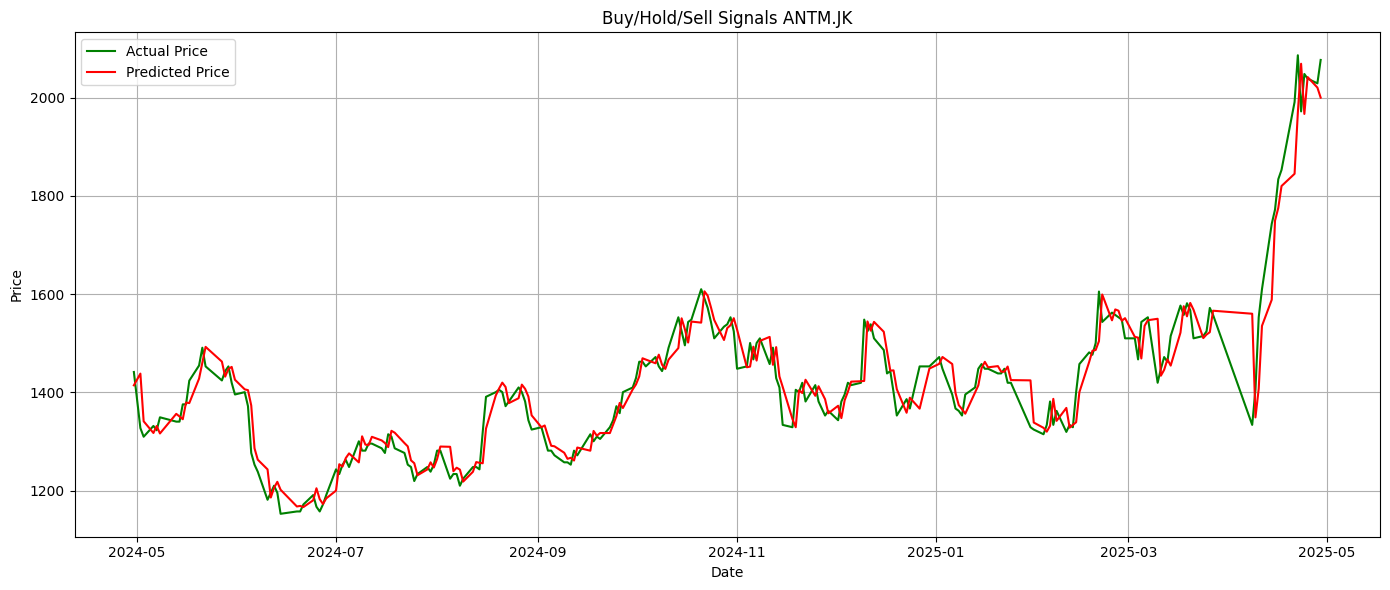

[*********************100%***********************]  1 of 1 completed



================================== BBNI.JK ==================================

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RMSE: 108.32199521019551
MAPE: 0.019783403909476107

Akurasi sinyal Buy/Hold/Sell: 0.4930875576036866

Classification Report:
              precision    recall  f1-score   support

         Buy       0.43      0.07      0.13        40
        Hold       0.52      0.88      0.66       113
        Sell       0.21      0.06      0.10        64

    accuracy                           0.49       217
   macro avg       0.39      0.34      0.29       217
weighted avg       0.41      0.49      0.39       217


Confusion Matrix:
[[  3  34   3]
 [  1 100  12]
 [  3  57   4]]


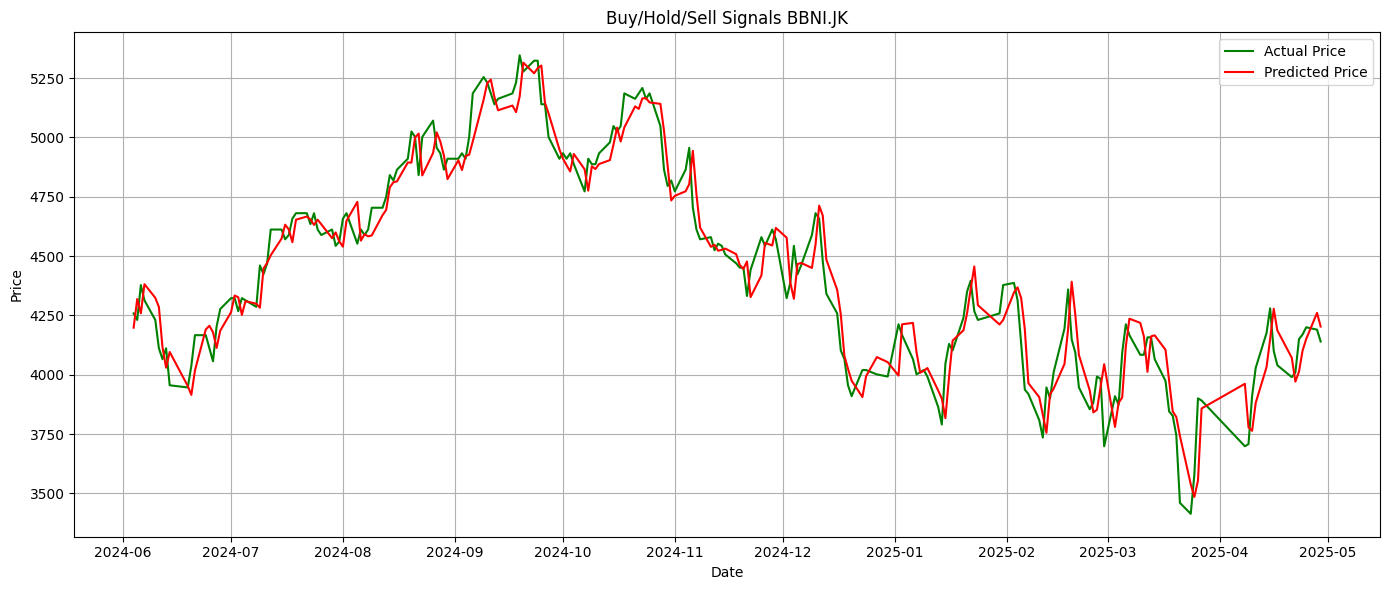

[*********************100%***********************]  1 of 1 completed



================================== BBRI.JK ==================================

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
RMSE: 90.59158012730857
MAPE: 0.017206819180230707

Akurasi sinyal Buy/Hold/Sell: 0.5780590717299579

Classification Report:
              precision    recall  f1-score   support

         Buy       0.50      0.02      0.03        62
        Hold       0.58      0.99      0.73       137
        Sell       0.00      0.00      0.00        38

    accuracy                           0.58       237
   macro avg       0.36      0.34      0.25       237
weighted avg       0.47      0.58      0.43       237


Confusion Matrix:
[[  1  61   0]
 [  1 136   0]
 [  0  38   0]]


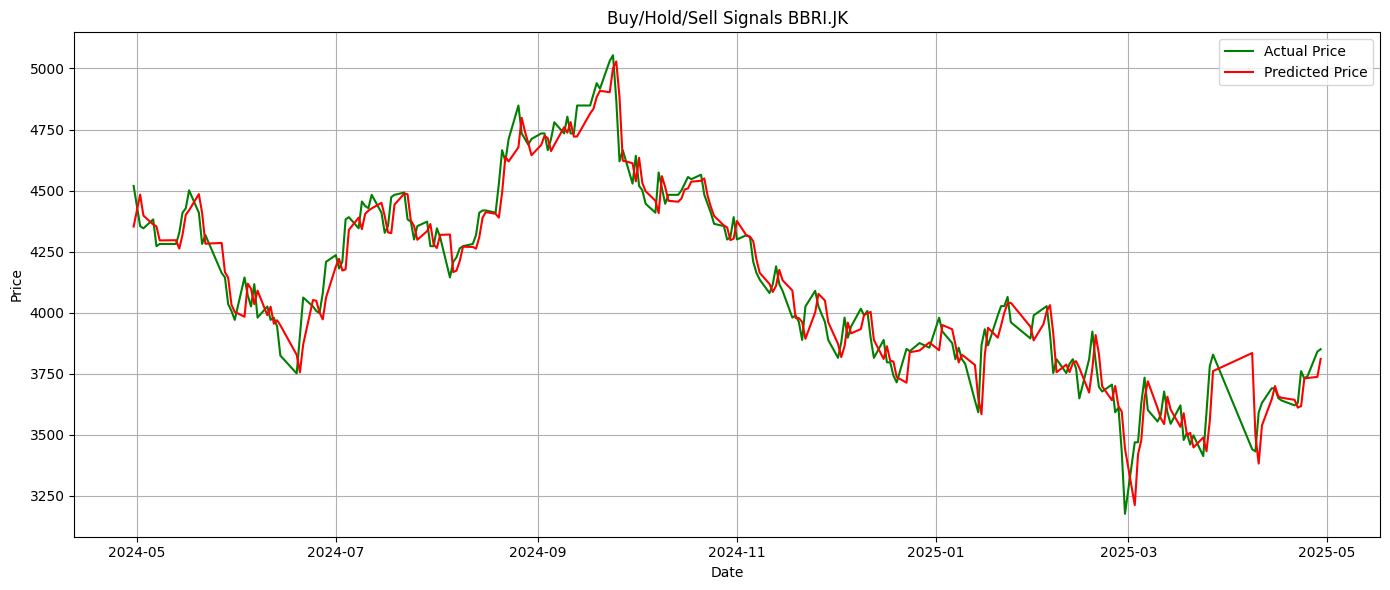

[*********************100%***********************]  1 of 1 completed



================================== BMRI.JK ==================================

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
RMSE: 129.43784389066883
MAPE: 0.018912316312478895

Akurasi sinyal Buy/Hold/Sell: 0.5911111111111111

Classification Report:
              precision    recall  f1-score   support

         Buy       0.00      0.00      0.00        14
        Hold       0.60      0.97      0.74       135
        Sell       0.40      0.03      0.05        76

    accuracy                           0.59       225
   macro avg       0.33      0.33      0.26       225
weighted avg       0.49      0.59      0.46       225


Confusion Matrix:
[[  0  14   0]
 [  1 131   3]
 [  0  74   2]]


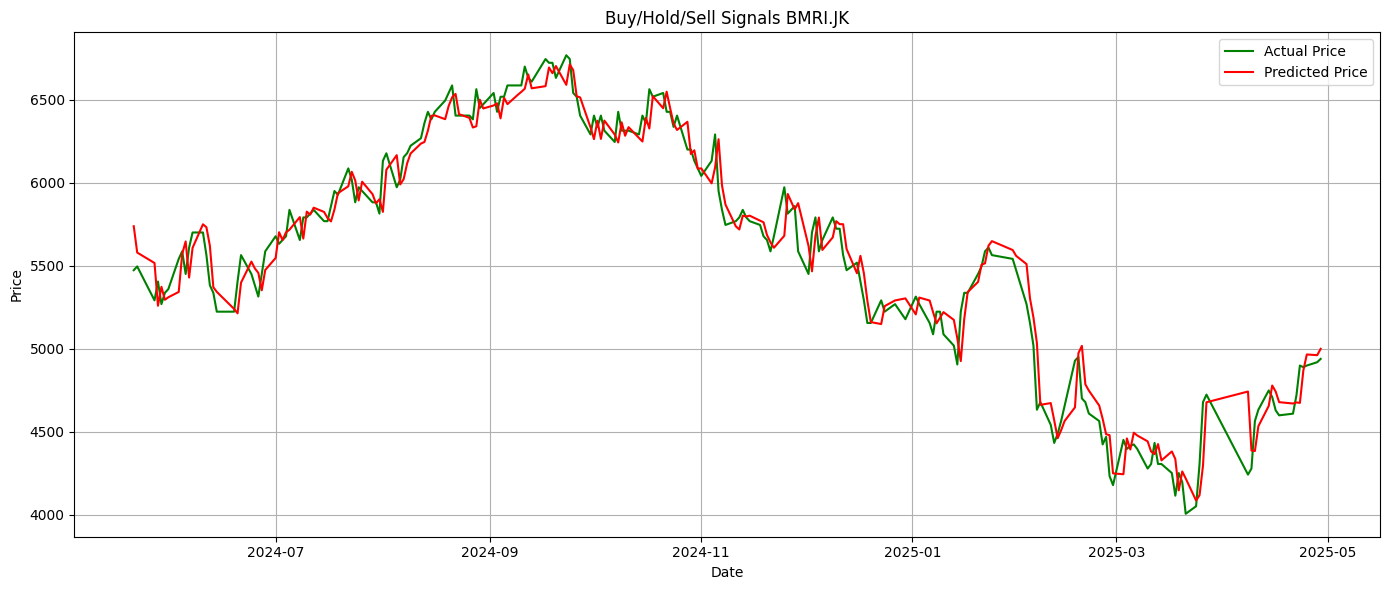

[*********************100%***********************]  1 of 1 completed



================================== TLKM.JK ==================================

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE: 55.79285704520138
MAPE: 0.0167120122556282

Akurasi sinyal Buy/Hold/Sell: 0.4396551724137931

Classification Report:
              precision    recall  f1-score   support

         Buy       0.88      0.11      0.19        64
        Hold       0.42      1.00      0.59        94
        Sell       1.00      0.01      0.03        74

    accuracy                           0.44       232
   macro avg       0.77      0.37      0.27       232
weighted avg       0.73      0.44      0.30       232


Confusion Matrix:
[[ 7 57  0]
 [ 0 94  0]
 [ 1 72  1]]


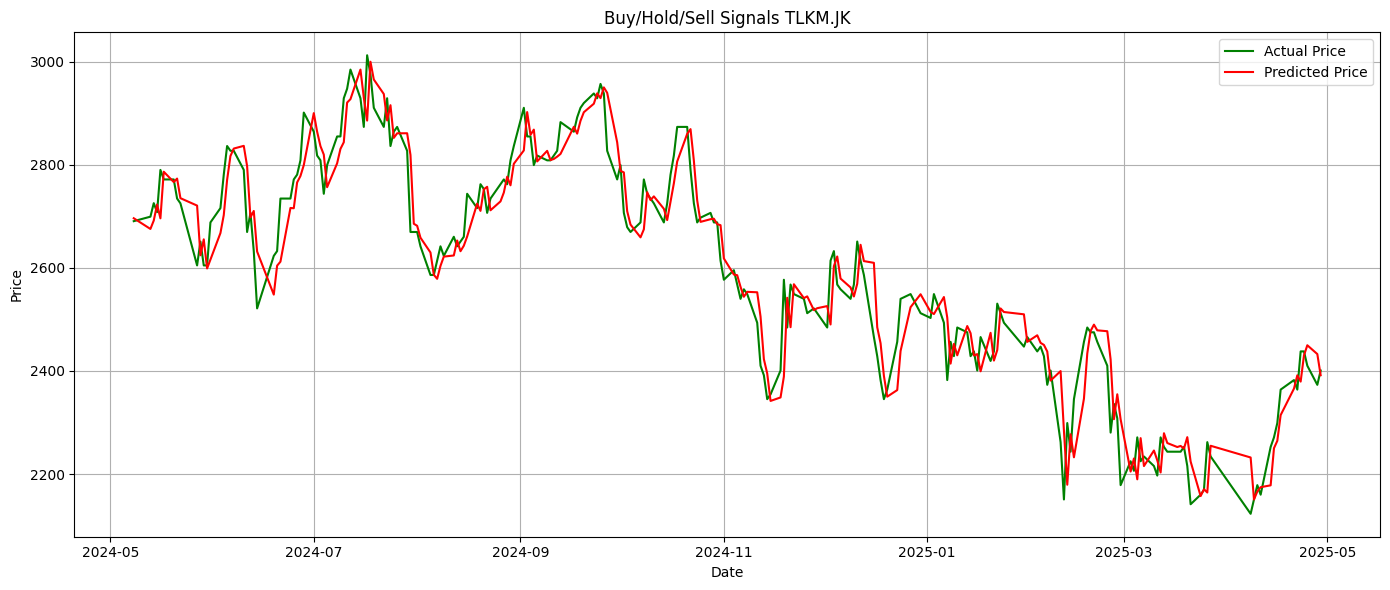

In [4]:
import os
import pandas as pd
import random
import tensorflow as tf
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, confusion_matrix, classification_report

from keras.models import load_model
from keras.optimizers import Adam

# ================================
# 0. Seed
# ================================
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

stocks = ['ANTM.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']
time_steps_list = [10, 90, 10, 60, 30]

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

def get_signal(actual_prices, future_prices, step_ahead=1, lower_threshold=0.05, upper_threshold=0.05):
  signals = []
  for i in range(len(actual_prices) - step_ahead):
      curr_price = actual_prices[i]
      future_price = future_prices[i + step_ahead]
      change = (future_price - curr_price) / curr_price

      if change >= upper_threshold:
          signals.append("Buy")
      elif change <= -lower_threshold:
          signals.append("Sell")
      else:
          signals.append("Hold")
  return signals

for i, stock in enumerate(stocks):
  print(f"\n\n================================== {stock} ==================================\n")
  # ================================
  # 1. Raw Data
  # ================================
  data = yf.download(stock, start='2021-05-01', end='2025-05-01')
  data = data[['Close']].dropna()
  data.rename(columns={'Close': 'Price'}, inplace=True)

  # ================================
  # 2. Normalisasi
  # ================================
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)

  # ================================
  # 3. Buat dataset untuk model
  # ================================
  time_step = time_steps_list[i]
  X, y = create_dataset(scaled_data, time_step)

  dates = data.index[time_step:]
  X = X.reshape((X.shape[0], X.shape[1], 1))

  # ================================
  # 4. Split Dataset (75% train, 25% test)
  # ================================
  train_size = int(len(X) * 0.75)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]
  dates_train, dates_test = dates[:train_size], dates[train_size:]

  # ================================
  # 5. Load Model RNN
  # ================================
  model = load_model("best_rnn_"+stock+".keras")

  # ================================
  # 6. Evaluasi Model
  # ================================
  y_pred = model.predict(X_test)

  # Inverse transform
  y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
  y_pred_inv = scaler.inverse_transform(y_pred)

  rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
  mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

  print("RMSE:", rmse)
  print("MAPE:", mape)

  # ================================
  # 7. Rekomendasi Buy/Hold/Sell Aktual dan Prediksi
  # ================================
  step_ahead = 1
  thresholds = {
      "ANTM.JK": (0.02, 0.01),
      "BBNI.JK": (0.01, 0.02),
      "BBRI.JK": (0.02, 0.01),
      "BMRI.JK": (0.01, 0.03),
      "TLKM.JK": (0.01, 0.01)
  }

  # thresholds = {
  #     "ANTM.JK": (0.05, 0.05),
  #     "BBNI.JK": (0.05, 0.05),
  #     "BBRI.JK": (0.05, 0.05),
  #     "BMRI.JK": (0.05, 0.05),
  #     "TLKM.JK": (0.05, 0.05)
  # }

  lt, ut = thresholds[stock]
  signals_actual = get_signal(y_test_inv.flatten(), y_test_inv.flatten(), step_ahead, lt, ut)
  signals_pred = get_signal(y_test_inv.flatten(), y_pred_inv.flatten(), step_ahead, lt, ut)

  dates_eval = dates_test[:-step_ahead]

  # ================================
  # 8. Evaluasi akurasi sinyal
  # ================================
  accuracy = accuracy_score(signals_actual, signals_pred)
  print("\nAkurasi sinyal Buy/Hold/Sell:", accuracy)

  print("\nClassification Report:")
  print(classification_report(signals_actual, signals_pred))

  print("\nConfusion Matrix:")
  print(confusion_matrix(signals_actual, signals_pred))

  # ================================
  # 9. Plot hasil
  # ================================
  plt.figure(figsize=(14,6))
  plt.plot(dates_eval, y_test_inv[:-step_ahead], label='Actual Price', color='green')
  plt.plot(dates_eval, y_pred_inv[:-step_ahead], label='Predicted Price', color='red')
  plt.title("Buy/Hold/Sell Signals "+stock)
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()